import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [4]:
df = df0.copy()

In [4]:
type(df.var1[3])

str

In [5]:
type(df.var2[1])

numpy.float64

In [6]:
type(df.salary[6])

NoneType

In [7]:
type(np.nan)

float

In [8]:
type(np.NaN)

float

In [9]:
type(None)

NoneType

In [10]:
print("1", 0 * np.nan)
print("2", np.nan - np.nan)
print("3", np.nan + np.nan)
print("4", np.nan - 10)
print("5", np.nan + 10)
print("6", np.nan == np.nan) # değer olarak eşit değil. çünkü belirsiz.
print("7", 10 > np.nan)
print("8", np.inf > np.nan) # değeri belirsiz olduğu için
                    # sonsuz > nan diye sorguladığımızda bile false veriyor
print("9", float('-inf') < np.nan < float('inf')) # nan, eksi sonsuz ile 
                        # artı sonsuz arasına düşen bir değer de değildir.
print("10", np.nan is np.nan) # is ile sorgulama yaptığınızda id değerlerini yani;
# memory location'ını sorgulamış olursunuz ki bu değerler aynıdır.
# Fakat bu; value'ları aynı demek değildir.

1 nan
2 nan
3 nan
4 nan
5 nan
6 False
7 False
8 False
9 False
10 True


In [11]:
np.nan == np.nan

False

In [12]:
np.nan is np.nan

True

In [13]:
df0.groupby('status', dropna=False).mean()

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [15]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [16]:
pd.Series([1, np.nan, np.NAN, 2, None])

0    1.0
1    NaN
2    NaN
3    2.0
4    NaN
dtype: float64

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [17]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [18]:
df.isnull()
# df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [19]:
df.notnull()
# df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [20]:
df.any()

id        True
gender    True
status    True
dept      True
var1      True
var2      True
salary    True
dtype: bool

In [21]:
df.isnull().any()
# bir satırda null deger olması onu true yapar

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [22]:
df.isnull().any(axis=1)
# sutun bazında çalışır

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [23]:
df.isnull().sum()
# True döndürenleri topladı

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [24]:
df.isnull().sum().sum()
# df'deki toplam null değeri

9

In [25]:
df.salary.isnull().sum()

3

In [26]:
round(df.isnull().sum() / len(df) * 100, 2)
# yüzdelik null sayıları

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [27]:
df.isnull().any(axis = 1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [28]:
df.isnull().all(axis = 1)
# hepsi null olsaydı True verecekti

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [29]:
df[df.isnull().any(axis = 1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [30]:
df[~df.isnull().any(axis = 1)]
# içinde nan değer olmayan sütünları getirdi

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [31]:
df.loc[df.isnull().all(axis = 1)]
# Hepsi NaN olan satırı getirdik

,id,gender,status,dept,var1,var2,salary


In [32]:
df.loc[df.salary.isnull()]
# df[salary.isnull()]
# salary'nin içindeki null olan satırlar

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [33]:
df[['dept','salary']][df.dept.isnull()]

,dept,salary
5,None,75
8,NaN,60


In [34]:
df.loc[df.dept.isnull(), ['dept','salary']]

,dept,salary
5,None,75
8,NaN,60


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [35]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [36]:
df['var1'].map({'-' : np.nan})
#map belirtilmeyen değerlerin hepsini de nan yapar

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [37]:
text = "cl-rusw-y"

In [38]:
text.replace("-", "a")

'clarusway'

In [39]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [40]:
df['var1'].replace(to_replace= '-', value = np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [41]:
df['var1'].replace(to_replace= '-', value = np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [42]:
df['var1'].replace(to_replace= '-', value = np.nan).astype('float')

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [43]:
df['var1'].replace(['-', 'nan'], np.nan)

0       2
1       3
2       5
3     NaN
4       7
5       1
6     NaN
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [44]:
df['var1'] = df['var1'].replace(to_replace= '-', value = np.nan).astype('float')

In [45]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [46]:
df['status'] = df['status'].replace(to_replace= '-', value = np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [47]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [48]:
df['gender'].map({'F' : 1, 'M': 0})

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [49]:
df.gender.replace(['M', 'F'], [0, 1])
# df["gender"].replace({"F" : 1, "M": 0})

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [50]:
df.gender

0     M
1     F
2     M
3     F
4     M
5     F
6     M
7     F
8     M
9     F
10    M
Name: gender, dtype: object

In [51]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

In [52]:
df0.isnull().sum()
# orjin

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [53]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [54]:
df.dropna(axis = 0, how = 'any', thresh = None, inplace = False)
# how = 'any', bir tane bile NaN ise o satırı düşürür
# sadece 4.satırda NaN değer yok
# default axis = 0, how = any, thresh = None, inplace = False

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [55]:
df.dropna(axis = 1, how = 'any', thresh = None, inplace = False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [56]:
df['delete_me'] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [57]:
df.dropna(axis = 1, how = 'all', thresh = None, inplace = False)
# how = 'all', bütün satırlar NaN is tüm satırlar düşecek
# axis = 0 olsaydı tün degerleri nan olanları düşecekti

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [58]:
df.dropna(axis = 1, how = 'all', thresh = None, inplace = True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [59]:
df.drop([1, 3, 5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [60]:
df.drop(['var1', 'var2'], axis = 1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


In [61]:
df.drop(columns=['var1', 'var2'])
#axis girmeye gerek yok columns olarak belirttik

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [62]:
df.dropna(axis = 1, how = 'all', thresh = 9, inplace = False)
# NaN olmayan en az 9(dahil) varsa değer varsa onu düşürmüyor. how'a dikkat etmiyor.  axis = 1 sutun dusur

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


 ## 2 - Filling Missing Values (Imputation)
 
 - fillna()
 - where()
 - interpolate()

In [63]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


 ### a.Filling with a specific value

In [64]:
df.fillna(0)
# tüm gördüğün yerlere 0 koy. sutunun dtype ne ise ona göre 0 koydu
# salary int oldugu için 0, var1 float oldugu için 0.0 status object oldugu için string 0 koydu

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [65]:
df.var1.fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 ### b.Filling with any Proper Value

In [66]:
df.var1.mean()

6.0

In [67]:
df['var1'].fillna(df.var1.mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [68]:
df['var1'].median()

5.5

In [69]:
df['var1'].fillna(df.var1.median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [70]:
df.mean()

C:\Users\Arslan\AppData\Local\Temp\ipykernel_11608\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [71]:
df.fillna(df.mean())
# Her sutuna her sutunun mean'i ile doldurduk

C:\Users\Arslan\AppData\Local\Temp\ipykernel_11608\1174623556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [72]:
df.fillna({'dept': 'Other', 'var1': df.var1.mean(), 'var2' : df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,Other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,Other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


In [73]:
df.mean()[['var1', 'var2']]

C:\Users\Arslan\AppData\Local\Temp\ipykernel_11608\2704356498.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()[['var1', 'var2']]


var1    6.000
var2    6.625
dtype: float64

In [74]:
df.fillna(df.mean()[['var1', 'var2']])
# sadece var1 ve var2'yi doldurdu

C:\Users\Arslan\AppData\Local\Temp\ipykernel_11608\2091622119.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean()[['var1', 'var2']])


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


**where() Replace values where the condition is False.**

In [75]:
df.notna()
#NaN olmayan degerleri getirdi

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [76]:
df.where(cond = df.notna(), other = df.mean(), axis = 1)
# where False olanları değiştirir.

C:\Users\Arslan\AppData\Local\Temp\ipykernel_11608\2435160377.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other = df.mean(), axis = 1)


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [77]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Fill NaN values using an interpolation method.**

In [78]:
df.interpolate()
# NaN değerin önceki ile sonraki değerinin ortalamasını alarak doldurur
# Tıpkı linspace'in yaptığı gibi aralığı eşit parçalara bölüyor.
# interpolate() iki dolu değerin arasındaki NaN sayısına göre aralığı eşit parçalara bölüp 
# her bir NaN'a gelecek değeri hesaplıyor
# salary'de yapmadı cunku basta ve sonda NaN var

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 ### c.Filling the Missing Values of Categorical Variables

In [79]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [80]:
df['dept'].mode()
# 3 deger de esit sayıda tekrar etmiş

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [81]:
df['dept'].mode()[0]

'AWS'

In [82]:
df["dept"].fillna(df['dept'].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [83]:
df.dept.fillna(method = 'bfill')
# kendisinden bir sonraki ile doldurur. Geriye dogru NaN'a giderken ondan bir önceki ile doldur demek

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [84]:
df["salary"].fillna(method = "ffill")
# ilk deger doldurmadı

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6      75.0
7     136.0
8      60.0
9     125.0
10    125.0
Name: salary, dtype: float64

In [85]:
df["salary"].fillna(method = "bfill")
# son degeri doldurmadı

0      54.0
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6     136.0
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [86]:
df["status"].fillna(method = "ffill")
# kendisinden bir önceki ile doldurur. İleriye dogru NaN'a giderken ondan bir önceki ile doldur demek

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

 ### d.Filling by condition & by Group of the Categorical Variables 

In [87]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [88]:
df.dept.fillna(method = 'ffill', inplace = True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [89]:
df.loc[df['salary'] > 100, 'status']

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [90]:
df.loc[df['salary'] < 100, 'status']

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [91]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [92]:
df.loc[df['salary'] >= 100, 'status'] = df.loc[df['salary'] >= 100, 'status'].fillna(df.loc[df.salary >= 100, 'status'].mode()[0])
df.loc[df['salary'] < 100, 'status'] = df.loc[df['salary'] < 100, 'status'].fillna(df.loc[df.salary < 100, 'status'].mode()[0])

In [93]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [94]:
df.groupby(['gender', 'dept'])['status'].apply(lambda x : x.mode())

gender  dept   
F       AWS   0    FT
        DS    0    FT
              1    PT
        FS    0    FT
              1    PT
M       AWS   0    PT
        DS    0    FT
              1    PT
        FS    0    FT
              1    PT
Name: status, dtype: object

In [95]:
df.groupby(['gender', 'dept'])['status'].apply(lambda x : x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [96]:
df.groupby(['gender', 'dept'])['status'].transform(lambda x : x.mode())

0      FT
1      PT
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
Name: status, dtype: object

In [97]:
df.groupby(['gender', 'dept'])['status'].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [98]:
df['trans_status'] = df.groupby(['gender', 'dept'])['status'].transform(lambda x : x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


In [102]:
df['status'].fillna(df.groupby(['gender', 'dept'])['status'].transform(lambda x : x.mode()[0]), inplace = True)
# and df['status'].fillna(df['trans_status'], inplace = True) da olur
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [103]:
df.groupby('dept').salary.mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [104]:
df.groupby(['status', 'dept']).salary.mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [105]:
df.groupby(['status', 'dept']).salary.transform('mean')

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [108]:
df.salary.fillna(df.groupby(['status', 'dept']).salary.transform('mean'))

0     125.0
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6     136.0
7     136.0
8      60.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [109]:
df['trans_salary'] = df.salary.fillna(df.groupby(['status', 'dept']).salary.transform('mean'))
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54,FT,54.0
2,P003,M,PT,AWS,5.0,5.0,59,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58,FT,58.0
5,P006,F,PT,DS,1.0,NaN,75,FT,75.0
6,P007,M,FT,FS,NaN,NaN,None,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60,FT,60.0
9,P010,F,FT,DS,NaN,7.0,125,FT,125.0


In [112]:
df.salary.fillna(df.trans_salary, inplace=True)
df.salary = df.salary.astype(int)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54,FT,54.0
2,P003,M,PT,AWS,5.0,5.0,59,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58,FT,58.0
5,P006,F,PT,DS,1.0,NaN,75,FT,75.0
6,P007,M,FT,FS,NaN,NaN,136,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60,FT,60.0
9,P010,F,FT,DS,NaN,7.0,125,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [113]:
df.groupby(['gender', 'status']).var1.mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [114]:
df.groupby(['gender', 'status']).var1.transform('mean')

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [116]:
trans_var1 = df.groupby(['gender', 'status']).var1.transform('mean')

In [119]:
df['var1'].fillna(trans_var1, inplace = True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54,FT,54.0
2,P003,M,PT,AWS,5.0,5.0,59,PT,59.0
3,P004,F,FT,AWS,10.0,8.0,120,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58,FT,58.0
5,P006,F,PT,DS,1.0,NaN,75,FT,75.0
6,P007,M,FT,FS,2.0,NaN,136,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60,FT,60.0
9,P010,F,FT,DS,10.0,7.0,125,FT,125.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [120]:
df.var2

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [121]:
df.groupby(['status'])['var2'].mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [123]:
df.groupby(['status'])['var2'].transform('mean')

0     6.25
1     7.00
2     7.00
3     6.25
4     7.00
5     7.00
6     6.25
7     6.25
8     7.00
9     6.25
10    7.00
Name: var2, dtype: float64

In [124]:
trans_var2 = df.groupby(['status'])['var2'].transform('mean')

In [125]:
df.var2.fillna(trans_var2, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.00,125,FT,125.0
1,P002,F,PT,FS,3.0,7.00,54,FT,54.0
2,P003,M,PT,AWS,5.0,5.00,59,PT,59.0
3,P004,F,FT,AWS,10.0,8.00,120,FT,120.0
4,P005,M,PT,DS,7.0,11.00,58,FT,58.0
5,P006,F,PT,DS,1.0,7.00,75,FT,75.0
6,P007,M,FT,FS,2.0,6.25,136,FT,136.0
7,P008,F,FT,FS,10.0,2.00,136,FT,136.0
8,P009,M,PT,FS,14.0,3.00,60,FT,60.0
9,P010,F,FT,DS,10.0,7.00,125,FT,125.0


### e.Filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [143]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [127]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

<AxesSubplot:>

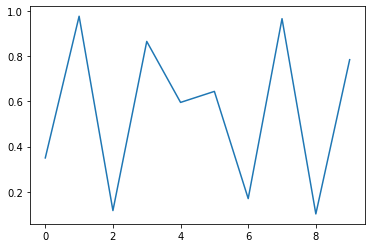

In [133]:
ser = pd.Series(np.random.rand(10))
ser.plot()

<AxesSubplot:>

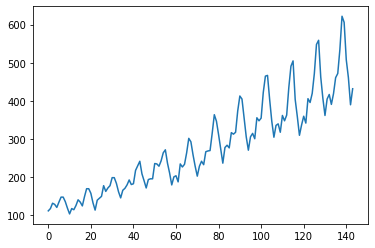

In [134]:
flights.passengers.plot()

In [144]:
flights_copy = flights.copy()

In [145]:
flights_copy.loc[np.random.randint(1,143,20), 'passengers']
# bastaki ve sondaki degerleri almadık. 
# Çünkü interpolate bastaki ve sondaki degerleri dolduramaz cunku iki değer arasındaki null degerlerini doldurur

53     243
47     194
27     163
122    406
69     229
115    505
52     229
74     267
85     277
67     293
7      148
87     313
106    305
92     355
83     278
131    405
73     233
38     193
81     274
16     125
Name: passengers, dtype: int64

In [146]:
flights_copy.loc[np.random.randint(1,144,20), 'passengers'] = np.nan

In [147]:
flights_copy

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,NaN
3,1949,Apr,129.0
4,1949,May,121.0
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,461.0
142,1960,Nov,NaN


In [148]:
flights_copy.isnull().sum()

year           0
month          0
passengers    19
dtype: int64

<AxesSubplot:>

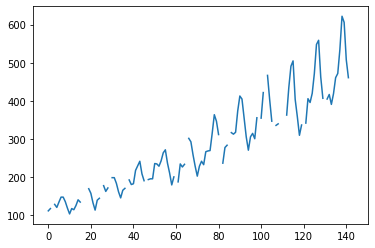

In [149]:
flights_copy.passengers.plot()
# nan degerler kopma yerleri

<AxesSubplot:>

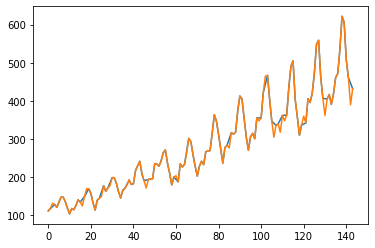

In [153]:
flights_copy['passengers'].interpolate().plot()
flights.passengers.plot()
# orjinali ile cok yakın degerler aldık
# linear olan bir veri seti varsa interpolate yöntemi kullanılabılır
# ikisini üst üste koyunca karsılaştırma yapıyor

<AxesSubplot:>

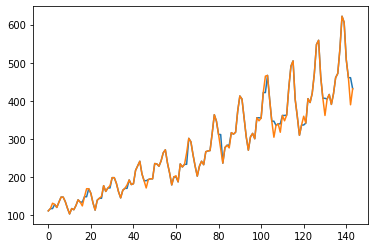

In [157]:
flights_copy['passengers'].fillna(method = 'ffill').plot()
flights.passengers.plot()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________